Hypothesis Evaluation

Firstly I have to admit that I am not quite familiar with Hypothesis Testing using statistical tests. So I started my approach trying a Logistic regression over the Age variable trying to prove that there is little correlation with why Employ tend towards attrition. But Finally I decided to implement just a chi-squared test on some categorical features.  

H0: There is no correlation between genders and Attrition. H1: females and males have different perspectives in Attrition.

         Yes   No  rowtotal
Gender                     
Female   501   87       588
Male     732  150       882
All     1233  237      1470
Chi-sq stat
208.520301028
Critical value
9.48772903678
P value
0.0


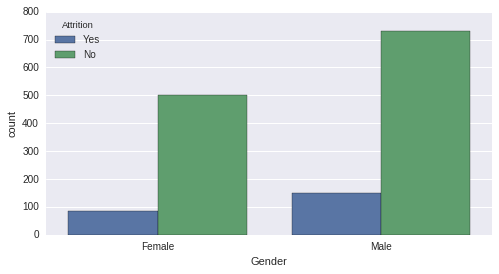

In [3]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

train_df = pd.read_csv('input/WA_Fn-UseC_-HR-Employee-Attrition.csv')
test = pd.DataFrame()


def table_building(row, col):
    test = pd.crosstab(index=row, columns=col, margins=True)
    test.columns = ["Yes", "No", "rowtotal"]
    return (test);


def chisq_test(t, i):
    # Get table without totals for later use
    observed = t.ix[0:2, 0:2]
    # To get the expected count for a cell.
    expected = np.outer(t["rowtotal"][0:2], t.ix["All"][0:2]) / 1010
    expected = pd.DataFrame(expected)
    expected.columns = ["Yes","No"]
    expected.index = test.index[0:2]
    # Calculate the chi-sq statistics
    chi_squared_stat = (((observed - expected) ** 2) / expected).sum().sum()
    print("Chi-sq stat")
    print(chi_squared_stat)
    crit = stats.chi2.ppf(q=0.95,  # Find the critical value for 95% confidence*
                          df=i)  # *
    print("Critical value")
    print(crit)
    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                                 df=i)
    print("P value")
    print(p_value)
    return;

test = table_building(train_df["Gender"],train_df["Attrition"])
print(test)
chisq_test(test,4)

plt.figure(figsize=(8,4)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x='Gender', hue = 'Attrition', data = train_df)
plt.show()

As per the results, and the p-value is larger than 0.05 (this is based in our assumption that we want a confidence level at 95%). So we fail to reject the non-hypothesis at 95% confidence level. In sum, there is no enough evidence to show females and males have different Attrition Tendency. Second, the distribution of male and female are close, and we can observe this pattern from histogram above.

Secondly we will examine the Job Involvement

H0: There is no correlation between Job Involvement and Attrition. H1: Job Involvement plays a significant role in Attrition.

                 Yes   No  rowtotal
JobInvolvement                     
1                 55   28        83
2                304   71       375
3                743  125       868
4                131   13       144
All             1233  237      1470
Chi-sq stat
79.3793764282
Critical value
9.48772903678
P value
2.22044604925e-16


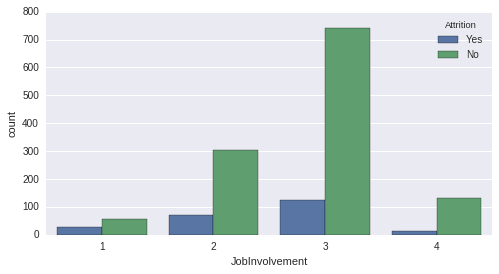

In [5]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

train_df = pd.read_csv('input/WA_Fn-UseC_-HR-Employee-Attrition.csv')
test = pd.DataFrame()


def table_building(row, col):
    test = pd.crosstab(index=row, columns=col, margins=True)
    test.columns = ["Yes", "No", "rowtotal"]
    return (test);


def chisq_test(t, i):
    # Get table without totals for later use
    observed = t.ix[0:2, 0:2]
    # To get the expected count for a cell.
    expected = np.outer(t["rowtotal"][0:2], t.ix["All"][0:2]) / 1010
    expected = pd.DataFrame(expected)
    expected.columns = ["Yes","No"]
    expected.index = test.index[0:2]
    # Calculate the chi-sq statistics
    chi_squared_stat = (((observed - expected) ** 2) / expected).sum().sum()
    print("Chi-sq stat")
    print(chi_squared_stat)
    crit = stats.chi2.ppf(q=0.95,  # Find the critical value for 95% confidence*
                          df=i)  # *
    print("Critical value")
    print(crit)
    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                                 df=i)
    print("P value")
    print(p_value)
    return;

test = table_building(train_df["JobInvolvement"],train_df["Attrition"])
print(test)
chisq_test(test,4)

plt.figure(figsize=(8,4)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x='JobInvolvement', hue = 'Attrition', data = train_df)
plt.show()

The conlcusions were the same as the above Hypothesis

4. Lookalike Model

I wes realy confused by this question. Finally I came across this Kaggle kenel which I believe is what you are looking for. Of course there were lots of 

The kaggle kernel I mentioned above is this https://www.kaggle.com/slamnz/ibm-employee-attrition-analysis-by-category . Here Mr. Lam calculates the cumulative percent of Attrition based in each categorical variable. With this way the Employes are grouped in clusters based on a specific feature each time. So an unkown Employ could possible be part of many groups in each one of them will have a propability to churn. So his behavior could be possible estimated.

Of course I would prefer an ML approach. So I will go with K-Means clustering. 

Firstly we will drop some features as we did for questions 1 and 2.

In [6]:
train_df.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber','HourlyRate','Gender'], axis=1, inplace=True)

train_df = pd.get_dummies(train_df, drop_first=True)

Then we will scale our data (we should have done that and for questions 1 and 2 for the regression model.

In [11]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

tsne = TSNE(n_components=2, perplexity=50, random_state=13)
X = tsne.fit_transform(StandardScaler().fit_transform(train_df))

then we will run a for loop in order to calculate silhouette_score and visualize our 2 dimension data in clusters. That is one of the most common ways to fins the suitable number of clusters.

('For n_clusters =', 2, 'The average silhouette_score is :', 0.43346917205002339)


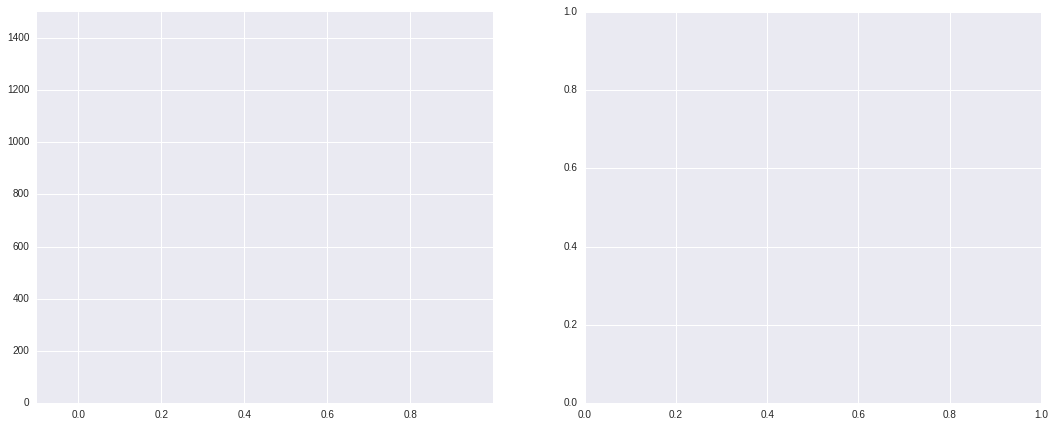

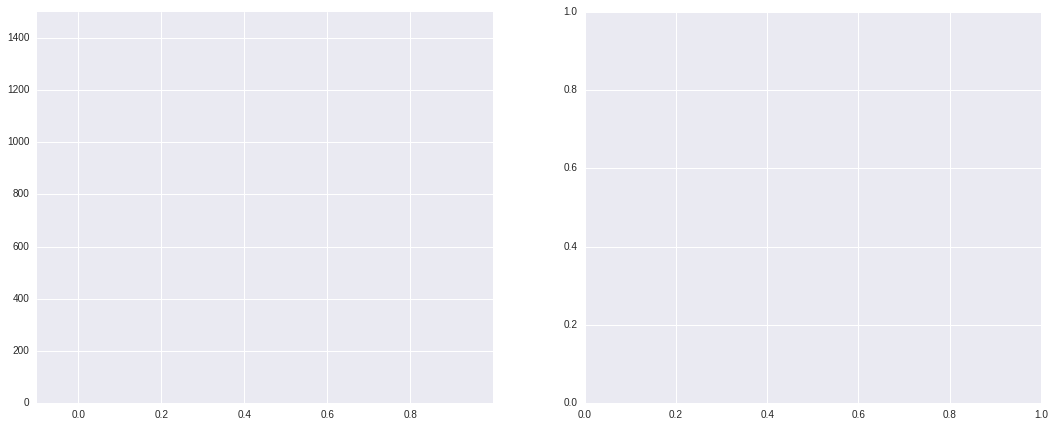

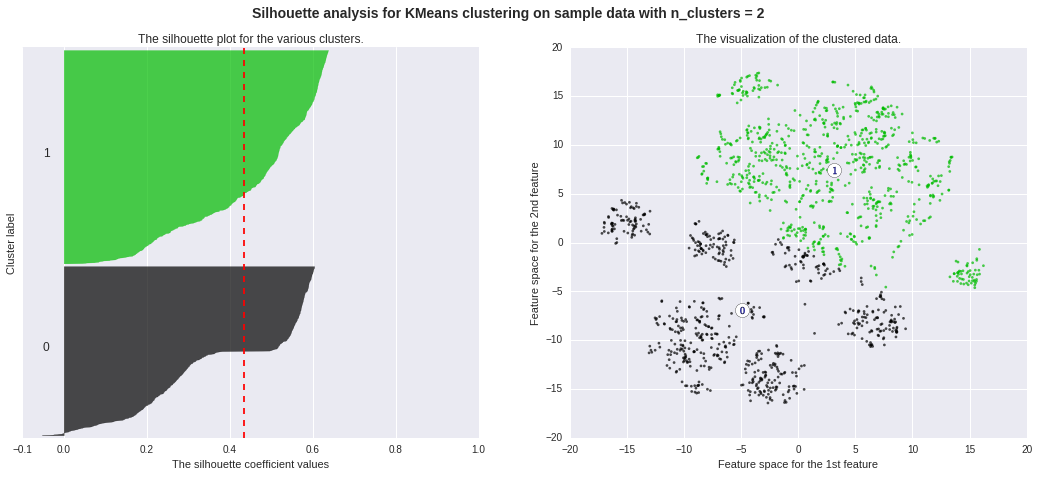

('For n_clusters =', 3, 'The average silhouette_score is :', 0.42204835159224929)


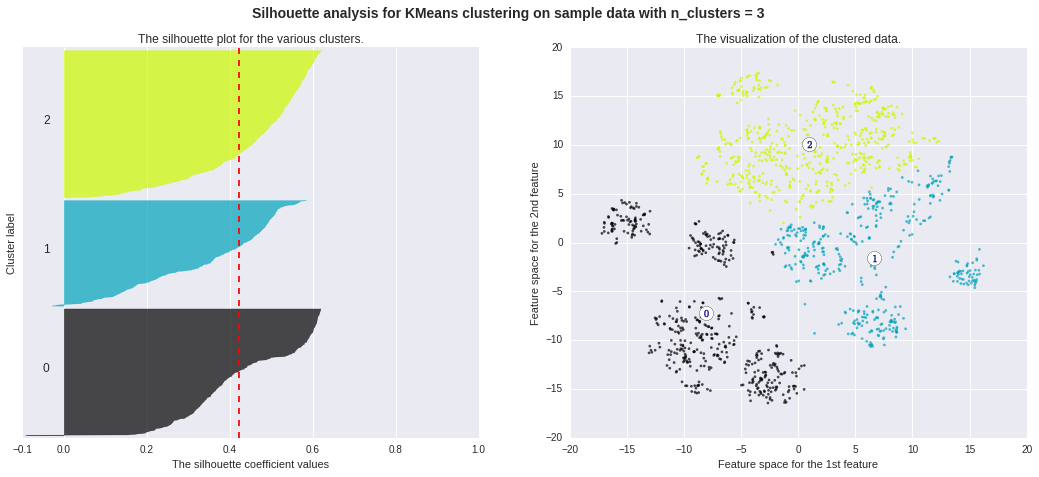

('For n_clusters =', 4, 'The average silhouette_score is :', 0.42640365090345195)


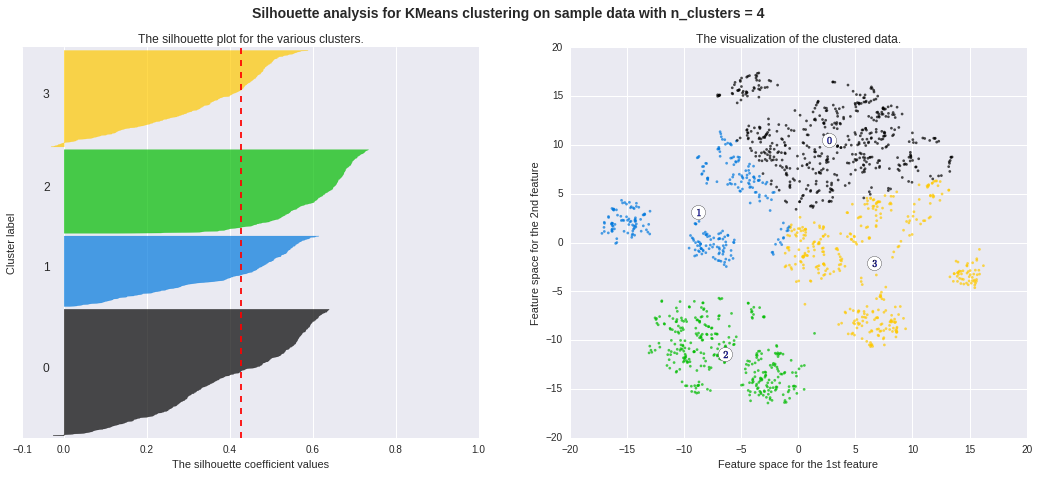

('For n_clusters =', 5, 'The average silhouette_score is :', 0.44623507105717308)


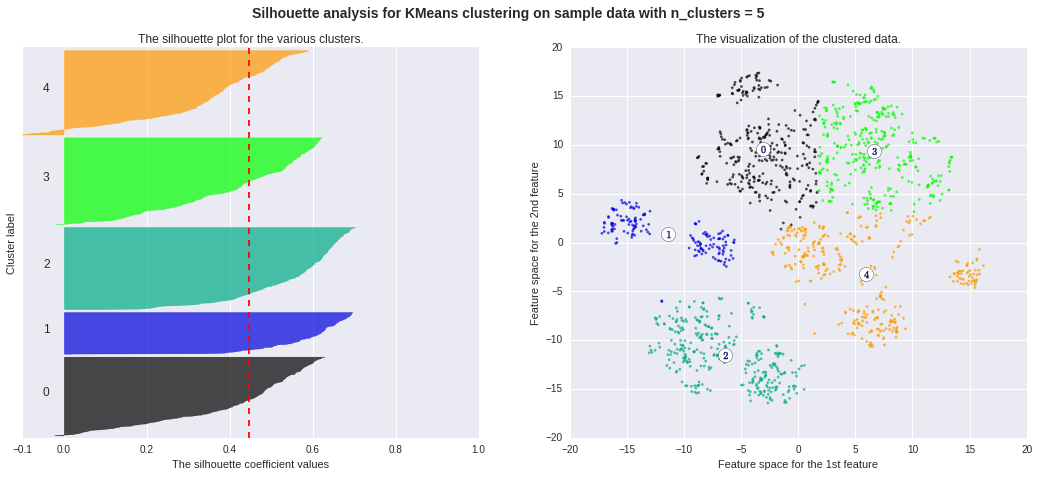

('For n_clusters =', 6, 'The average silhouette_score is :', 0.47024616644192524)


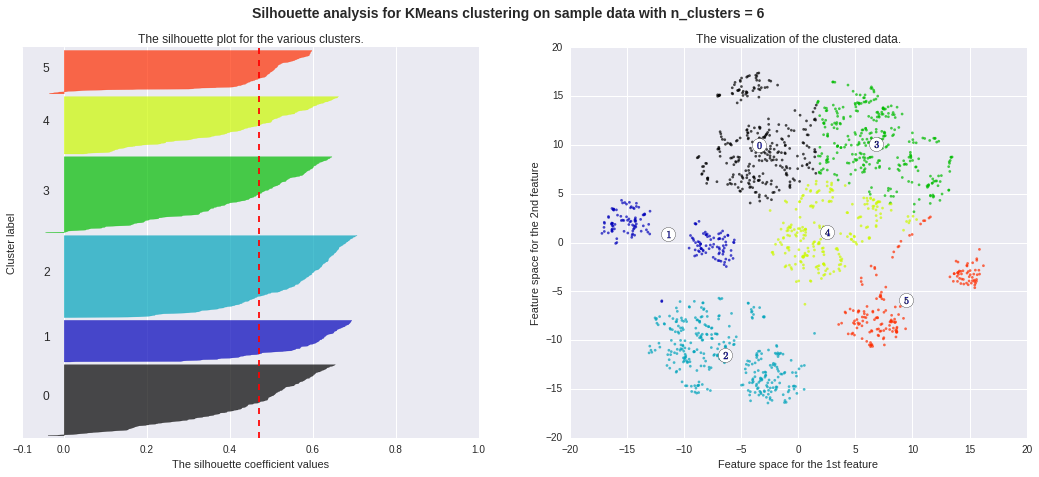

('For n_clusters =', 7, 'The average silhouette_score is :', 0.46294161145091228)


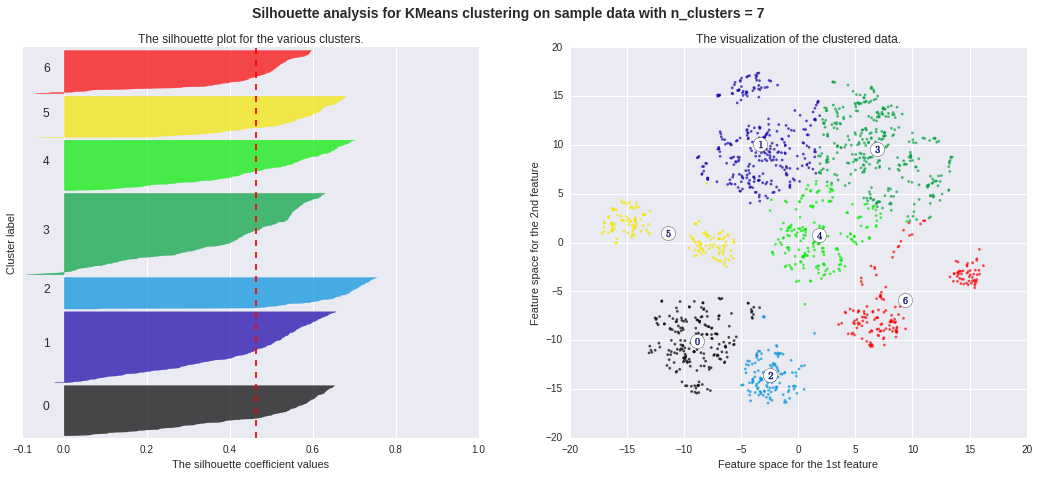

('For n_clusters =', 8, 'The average silhouette_score is :', 0.47778368112902442)


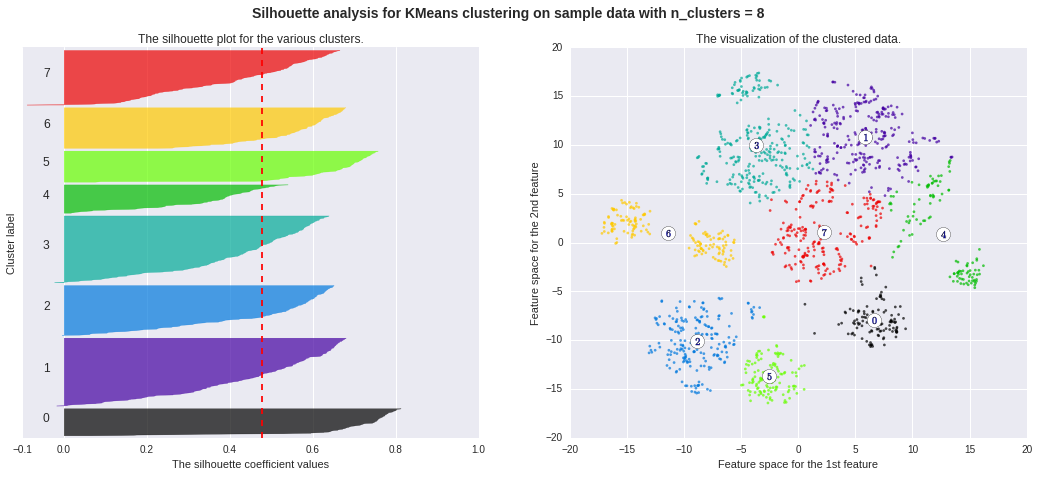

('For n_clusters =', 9, 'The average silhouette_score is :', 0.48507793654196152)


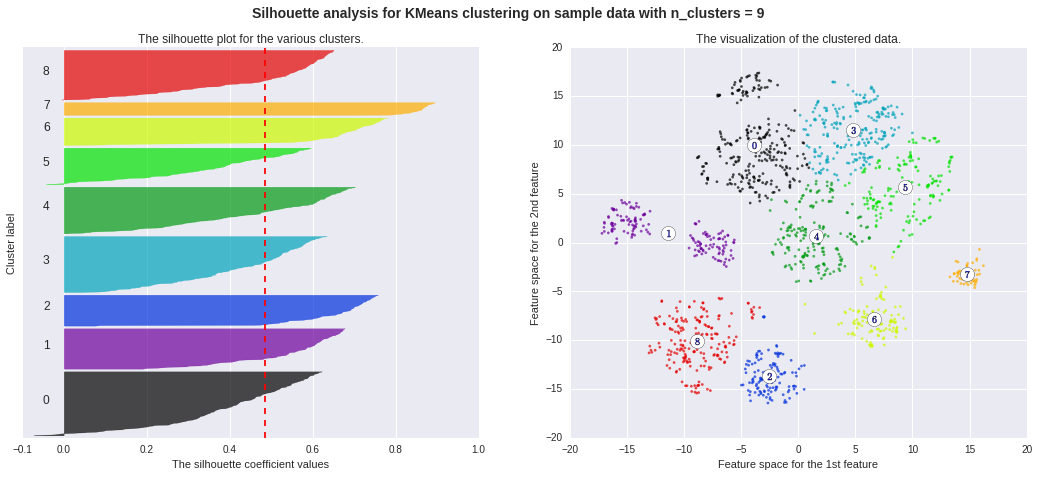

('For n_clusters =', 10, 'The average silhouette_score is :', 0.49009673421628763)


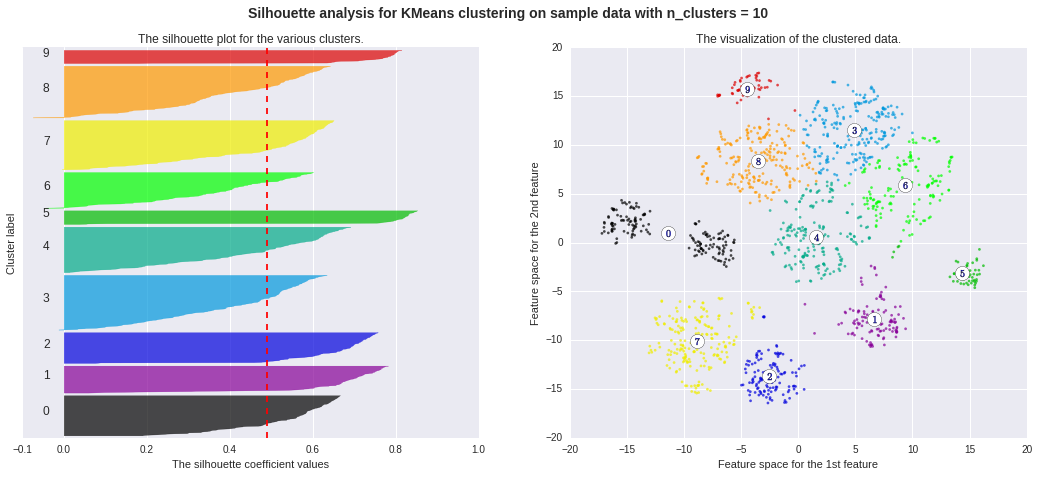

('For n_clusters =', 11, 'The average silhouette_score is :', 0.50165839411813296)


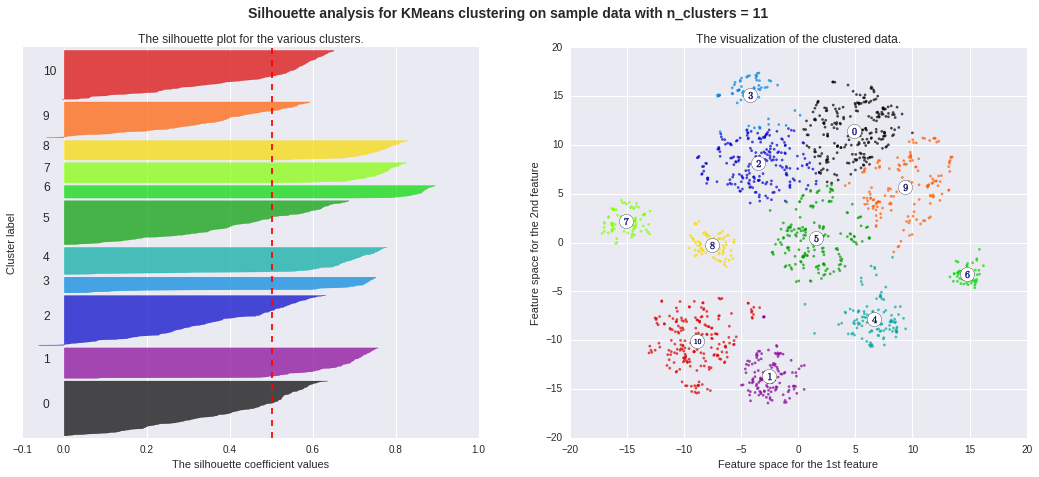

('For n_clusters =', 12, 'The average silhouette_score is :', 0.50407163150421141)


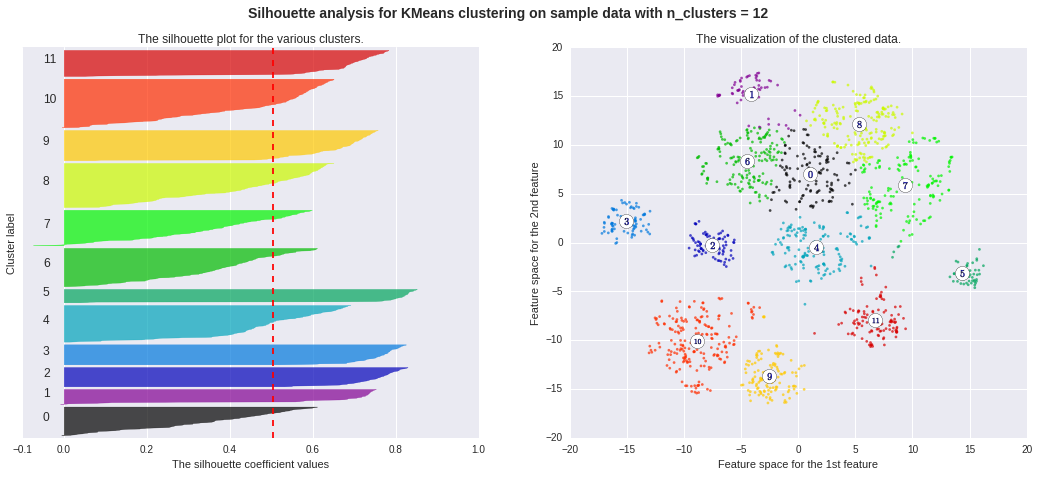

('For n_clusters =', 13, 'The average silhouette_score is :', 0.51576477996613823)


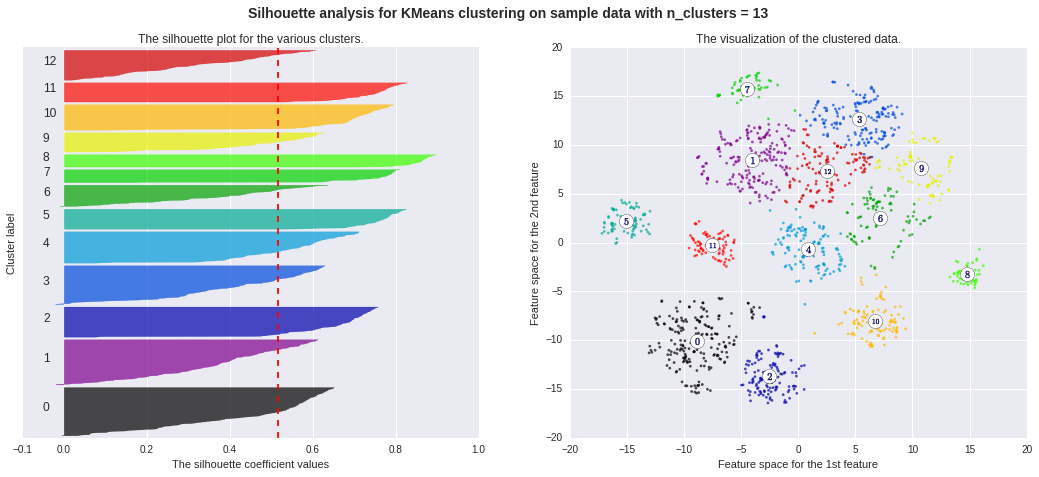

('For n_clusters =', 14, 'The average silhouette_score is :', 0.51129391567594995)


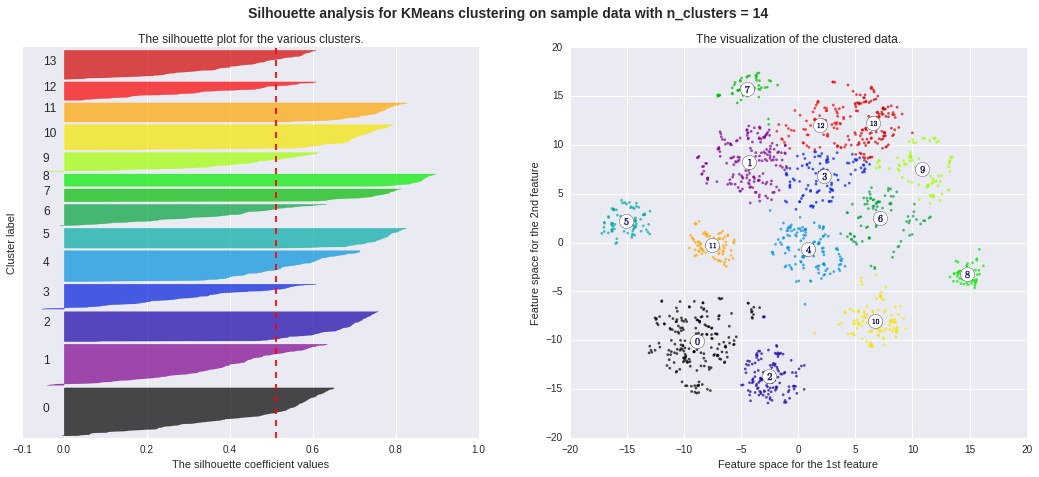

('For n_clusters =', 15, 'The average silhouette_score is :', 0.49767801079238422)


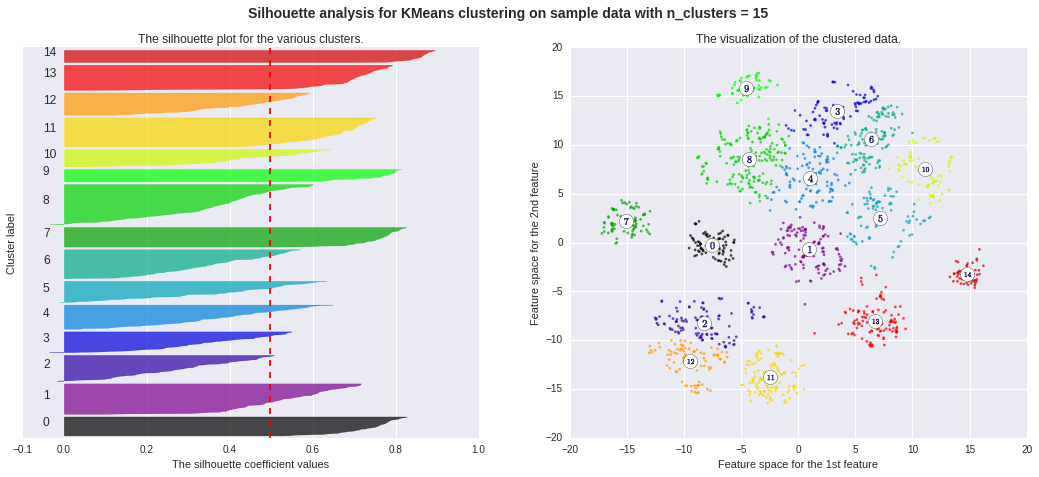

('For n_clusters =', 16, 'The average silhouette_score is :', 0.50540107749563989)


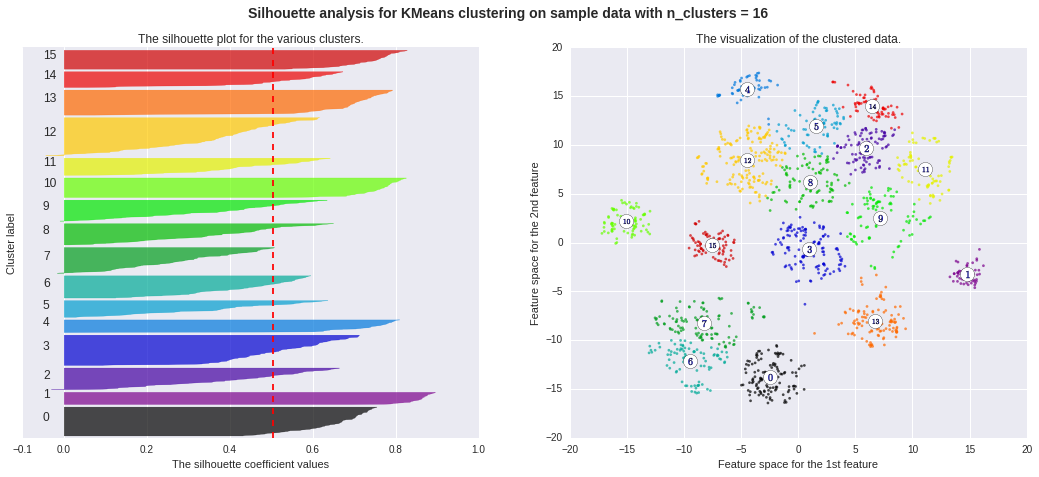

('For n_clusters =', 17, 'The average silhouette_score is :', 0.4836535162249232)


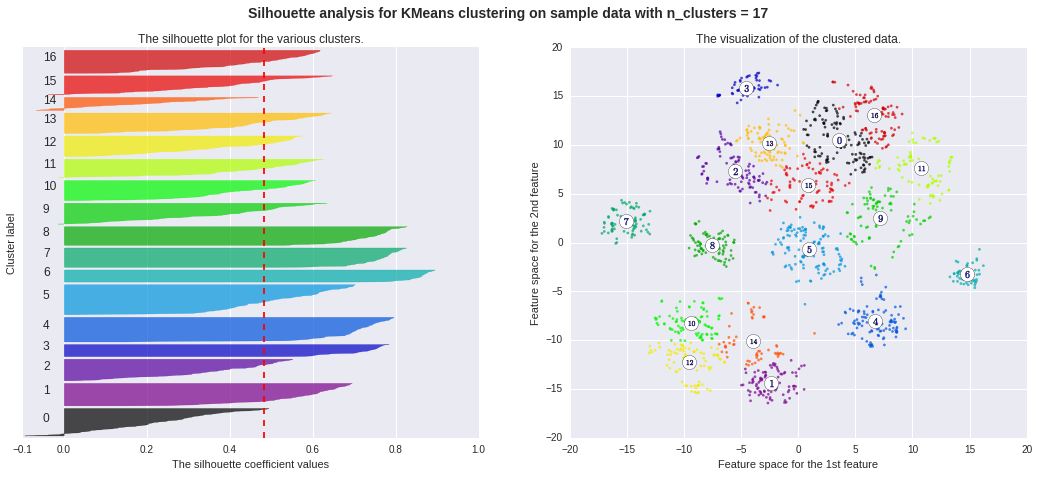

('For n_clusters =', 18, 'The average silhouette_score is :', 0.4835051459452554)


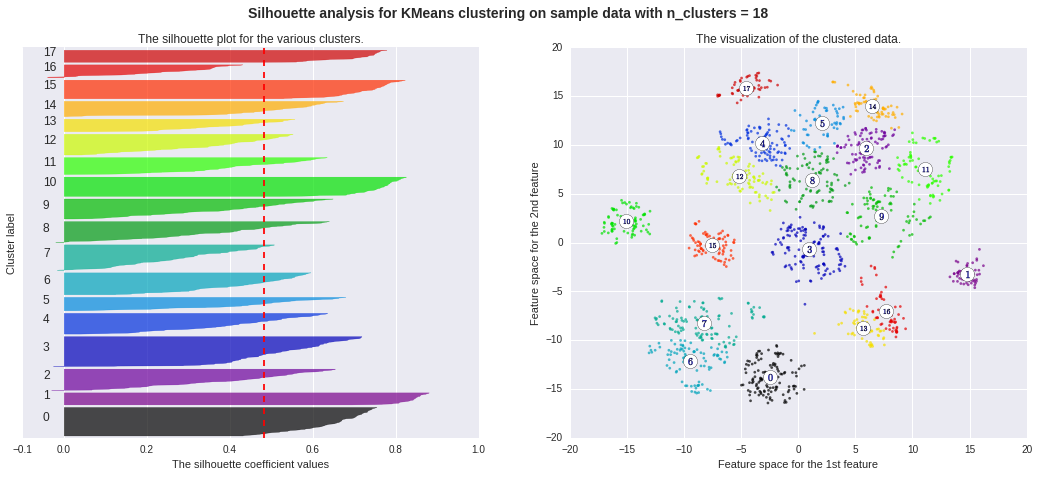

('For n_clusters =', 19, 'The average silhouette_score is :', 0.47520502488991362)


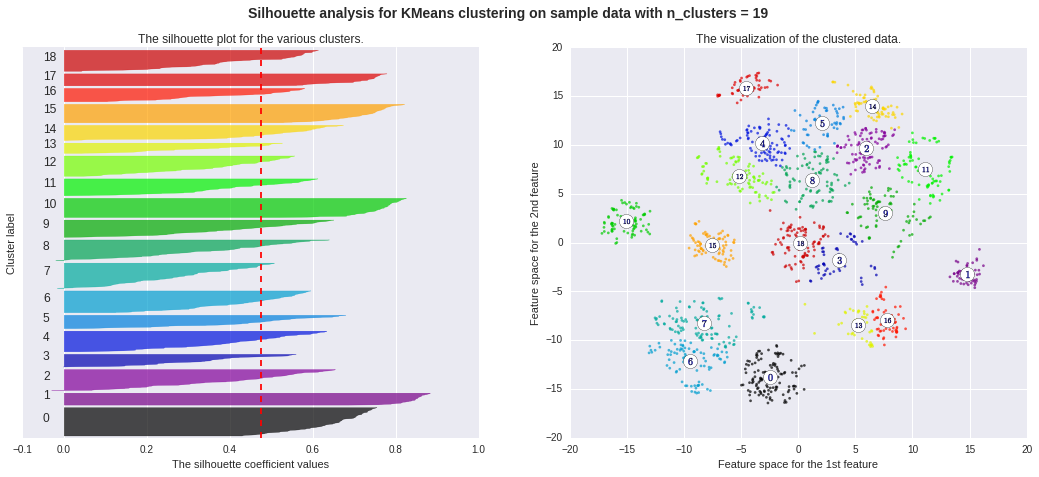

('For n_clusters =', 20, 'The average silhouette_score is :', 0.45775820708248682)


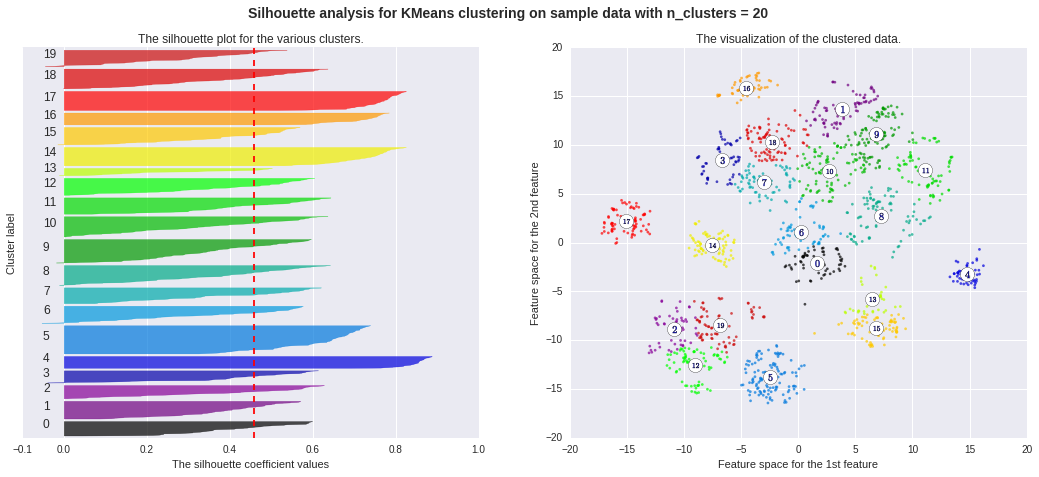

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# range_n_clusters =[5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    # clusterer = MeanShift(bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=1)
    clusterer = KMeans(n_clusters=n_clusters, init='random', random_state=333)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

So we can choose 13 as the number of clusters and check the statisticks for each cluster.

In [14]:
train_df['cluster'] = cluster_labels

for i in range(15):
    df = train_df.loc[train_df['cluster']==i]
    print(df.describe())

             Age    DailyRate  DistanceFromHome  Education  \
count  63.000000    63.000000         63.000000  63.000000   
mean   38.206349   820.619048          9.920635   2.904762   
std     8.606372   378.476804          9.485646   1.073347   
min    22.000000   163.000000          1.000000   1.000000   
25%    31.500000   490.000000          2.000000   2.000000   
50%    37.000000   853.000000          6.000000   3.000000   
75%    42.500000  1086.000000         18.000000   4.000000   
max    59.000000  1492.000000         29.000000   5.000000   

       EnvironmentSatisfaction  JobInvolvement   JobLevel  JobSatisfaction  \
count                63.000000       63.000000  63.000000        63.000000   
mean                  2.968254        2.587302   2.619048         2.841270   
std                   1.031258        0.754234   0.705476         1.019272   
min                   1.000000        1.000000   2.000000         1.000000   
25%                   2.500000        2.000000   2.

              Age    DailyRate  DistanceFromHome   Education  \
count  122.000000   122.000000        122.000000  122.000000   
mean    37.868852   735.139344         10.500000    3.245902   
std      8.343801   388.777599          8.261481    1.006684   
min     24.000000   118.000000          1.000000    1.000000   
25%     32.000000   415.250000          4.000000    3.000000   
50%     36.000000   693.500000          9.000000    3.000000   
75%     42.750000  1053.250000         15.750000    4.000000   
max     60.000000  1499.000000         29.000000    5.000000   

       EnvironmentSatisfaction  JobInvolvement    JobLevel  JobSatisfaction  \
count               122.000000      122.000000  122.000000       122.000000   
mean                  2.721311        2.729508    2.344262         2.663934   
std                   1.062216        0.603528    0.557006         1.175583   
min                   1.000000        1.000000    2.000000         1.000000   
25%                   2.0000

             Age    DailyRate  DistanceFromHome  Education  \
count  88.000000    88.000000         88.000000  88.000000   
mean   39.045455   905.250000         10.693182   3.136364   
std     7.824085   380.739397          8.183749   0.886447   
min    25.000000   117.000000          1.000000   1.000000   
25%    34.000000   651.500000          4.000000   3.000000   
50%    37.000000   972.500000          9.000000   3.000000   
75%    44.000000  1226.000000         16.000000   4.000000   
max    58.000000  1495.000000         29.000000   5.000000   

       EnvironmentSatisfaction  JobInvolvement   JobLevel  JobSatisfaction  \
count                88.000000       88.000000  88.000000        88.000000   
mean                  2.875000        2.840909   2.136364         2.670455   
std                   1.014974        0.756373   0.664049         1.171712   
min                   1.000000        1.000000   1.000000         1.000000   
25%                   2.000000        3.000000   2.